In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

In [50]:
# Load insurance data
df = pd.read_csv('insurance.csv')

In [51]:
df.shape

(1338, 7)

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
# Ceate a list of conditions
conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30)
    ]

# Create a list of promotion variables
values = ['underweight', 'normal', 'overweight', 'obese']

# Create the new variable 
df['BMI'] = np.select(conditions, values)

In [55]:
#df.drop('bmi', axis=1, inplace=True)

Combine those with 4 and 5 children with those with 3 children.

In [56]:
# Ceate a list of conditions
conditions = [
    (df['children'] == 0),
    (df['children'] == 1),
    (df['children'] == 2),
    (df['children'] >= 3)
    ]

# Create a list of promotion variables
values = [0, 1, 2, 3]

# Create the new variable 
df['children'] = np.select(conditions, values)

In [57]:
df.children.value_counts()

0    574
1    324
2    240
3    200
Name: children, dtype: int64

In [58]:
# Create a list of categorical features
cat_vars = df.select_dtypes(include=[np.object]).columns.tolist()

# Create a list of numerical features
num_vars = ['age', 'children']

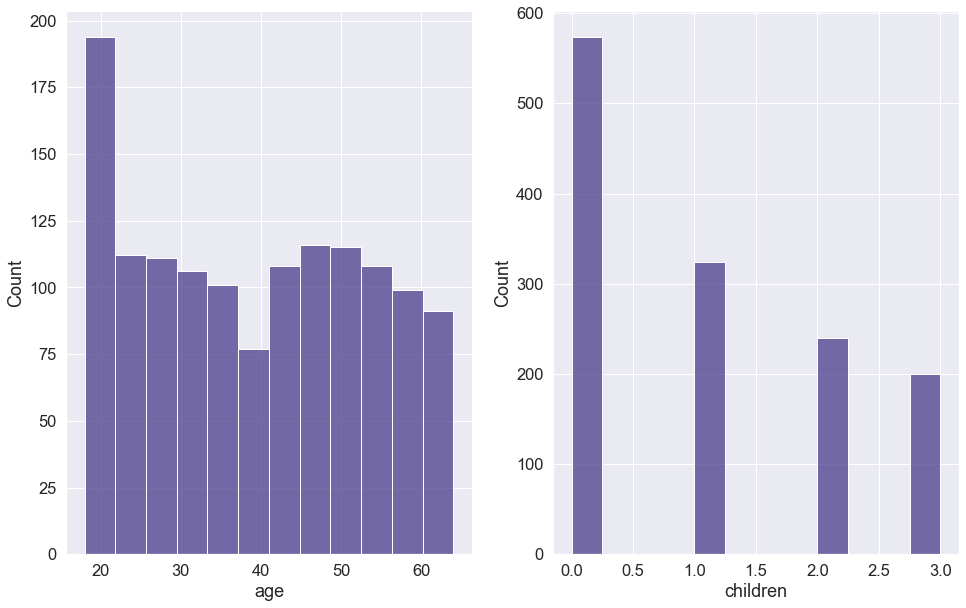

In [59]:
# Create histograms of numerical features
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
#fig.subplots_adjust(hspace=0.2, wspace=0.3)
sns.set_theme(style='whitegrid')
for var, ax in zip(num_vars, axes.flatten()):
    sns.histplot(data=df, x=var, ax=ax, color='darkslateblue')

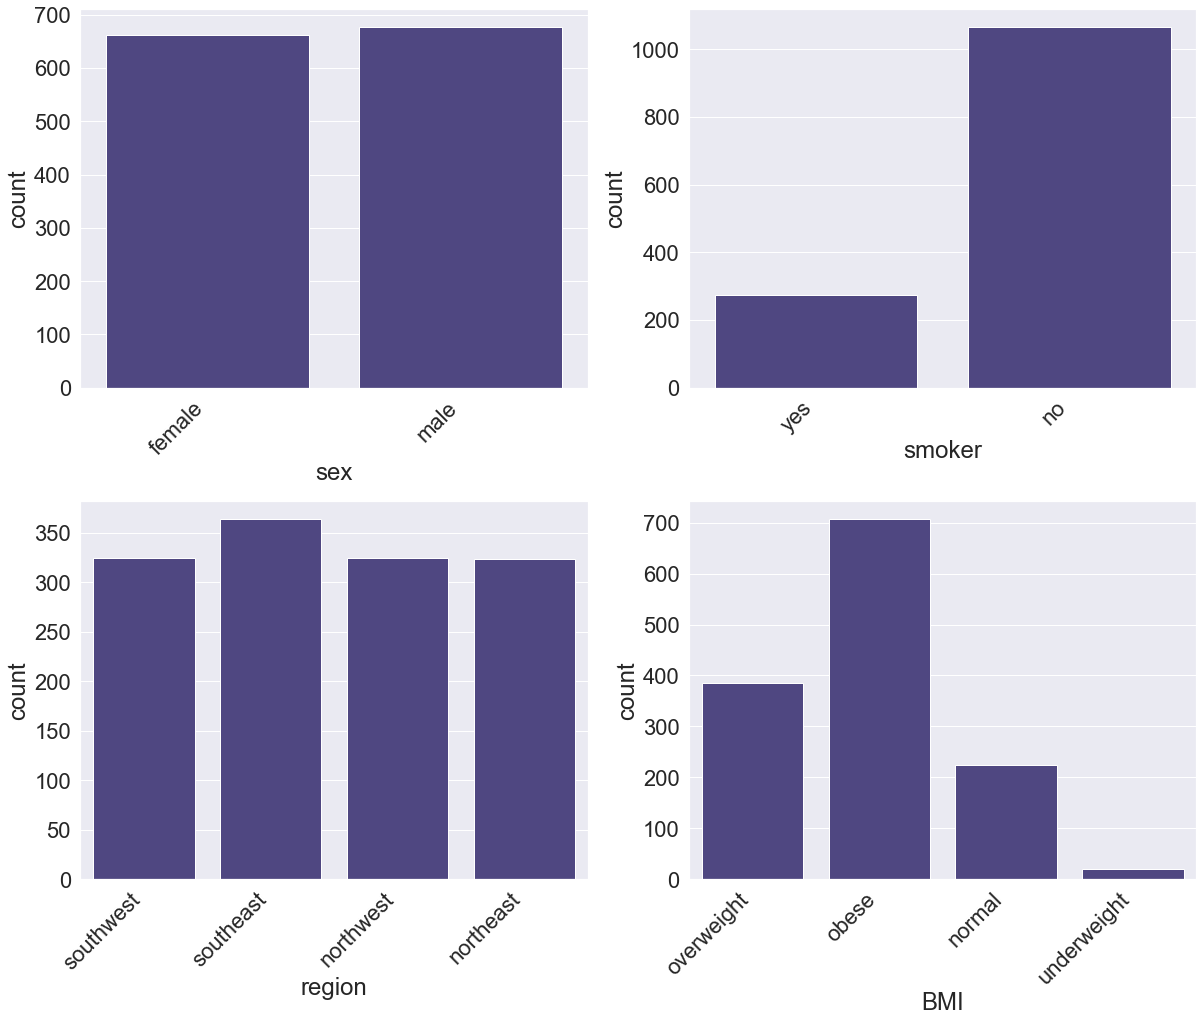

In [60]:
# Create plots of categorical features 
sns.set(font_scale=2)
#plt.rcParams.update({'font.size': 30})
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.subplots_adjust(hspace=0.3)
sns.set_theme(style='whitegrid')
for var, ax in zip(cat_vars, axes.flatten()):
    sns.countplot(data=df, x=var, ax=ax, color='darkslateblue')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [61]:
bin_vars = ['sex', 'smoker']
for var in bin_vars:
    lb = LabelBinarizer()
    df[var] = lb.fit_transform(df[var])

In [62]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

Convert BMI:

0=underweight, 1=normal, 2=overweight, 3=obese

In [63]:
# Ceate a list of conditions
conditions = [
    (df['BMI'] == 'underweight'),
    (df['BMI'] == 'normal'),
    (df['BMI'] == 'overweight'),
    (df['BMI'] == 'obese')
    ]

# Create a list of promotion variables
values = [0, 1, 2, 3]

# Create the new variable 
df['BMI'] = np.select(conditions, values)

In [64]:
scatters = df.drop(['charges','bmi'], axis=1).columns

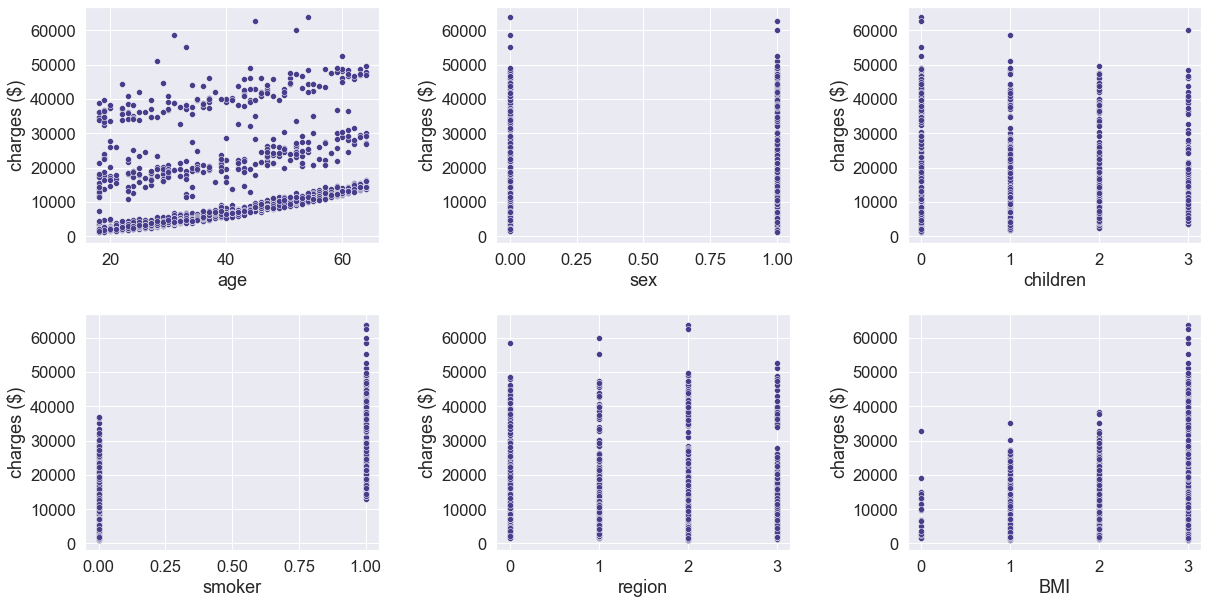

In [65]:
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
sns.set_style(style='whitegrid')
for var, ax in zip(scatters, axes.flatten()):
    sns.scatterplot(x=var, y='charges', data=df, ax=ax, color='darkslateblue')
    ax.set(ylabel='charges ($)')

Take a closer look at age, smoker, and BMI by creating a 3D scatterplot with hue=smoker 

In [66]:
closer = ['age', 'BMI']

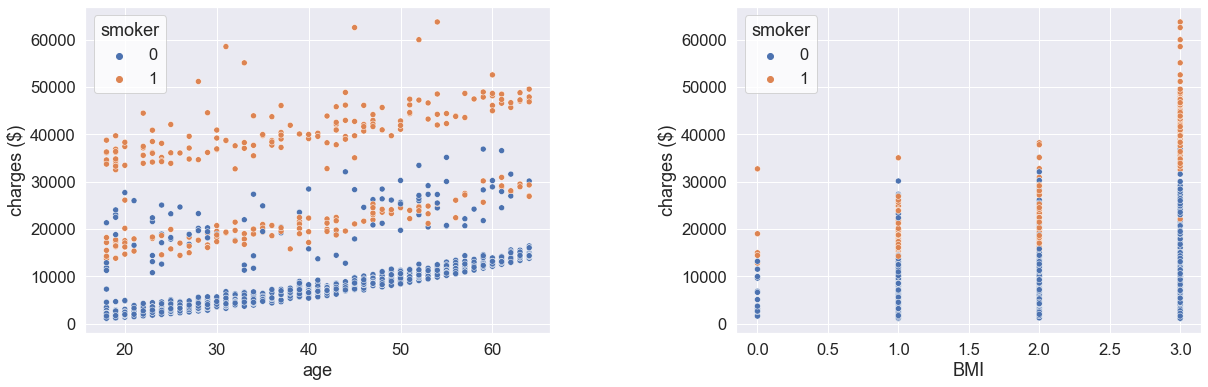

In [67]:
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
sns.set_style(style='whitegrid')
for var, ax in zip(closer, axes.flatten()):
    sns.scatterplot(x=var, y='charges', hue = 'smoker', data=df, ax=ax)#, color='darkslateblue')
    ax.set(ylabel='charges ($)')

Take a closer look using BMI as the continuous variable in the original data

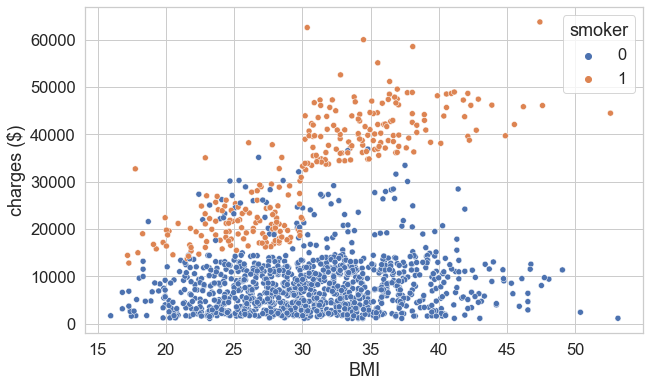

In [68]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
sns.set_style(style='whitegrid')
ax = sns.scatterplot(x='bmi', y='charges', hue = 'smoker', data=df)
ax.set(xlabel='BMI', ylabel='charges ($)')
plt.show()

In [279]:
# This is to split the data into train, validation, and test data
x_train, x_test, y_train, y_test = train_test_split(df.drop(['charges','bmi'], axis=1),
                                                    df['charges'],
                                                    train_size = 0.50,
                                                    random_state=11)
x_val, x_test, y_val, y_test = train_test_split(x_test, 
                                                  y_test, 
                                                  train_size=0.50, 
                                                  random_state=11)

Feature selection using Decision Tree Regressor

Feature: age - Score: 0.153
Feature: sex - Score: 0.014
Feature: children - Score: 0.029
Feature: smoker - Score: 0.623
Feature: region - Score: 0.016
Feature: BMI - Score: 0.165


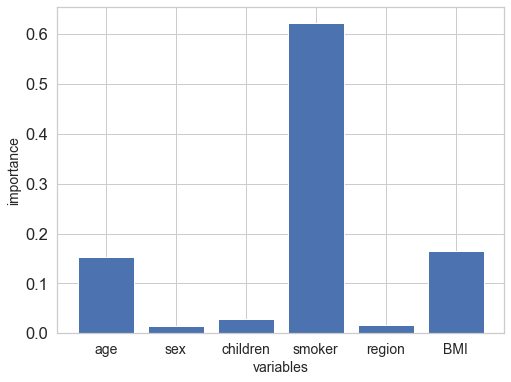

In [280]:
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {} - Score: {}'.format(x_train.columns[i],round(v,3)))
# plot feature importance
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=np.arange(6), labels=x_train.columns, size=14)
plt.xlabel('variables', size=14)
plt.ylabel('importance', size=14)
plt.show()

In [281]:
# This is to split the data into train, validation, and test data
x_train, x_test, y_train, y_test = train_test_split(df.drop(['charges','BMI'], axis=1),
                                                    df['charges'],
                                                    train_size = 0.50,
                                                    random_state=11)
x_val, x_test, y_val, y_test = train_test_split(x_test, 
                                                  y_test, 
                                                  train_size=0.50, 
                                                  random_state=11)

Feature: age - Score: 0.138
Feature: sex - Score: 0.008
Feature: bmi - Score: 0.209
Feature: children - Score: 0.016
Feature: smoker - Score: 0.619
Feature: region - Score: 0.011


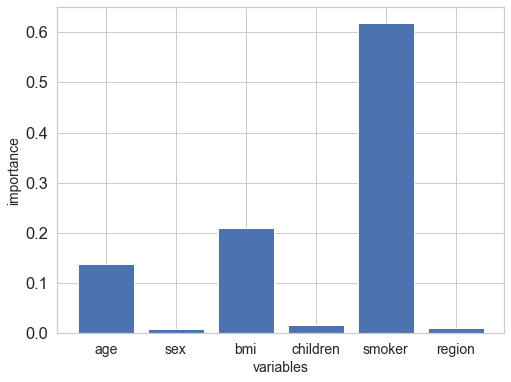

In [282]:
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {} - Score: {}'.format(x_train.columns[i],round(v,3)))
# plot feature importance
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=np.arange(6), labels=x_train.columns, size=14)
plt.xlabel('variables', size=14)
plt.ylabel('importance', size=14)
plt.show()

In [283]:
x_train.shape

(669, 6)

In [284]:
x_val.shape

(334, 6)

In [285]:
x_test.shape

(335, 6)

In [286]:
# age, smoker, and BMI are the most significant factors 
features = ['age', 'smoker', 'bmi']

In [287]:
# Training and testing using Linear Regression Model
lr = LinearRegression().fit(x_train[features], y_train)
lr_y_pred = lr.predict(x_val[features])
print('Mean Absolute Error:', round(mean_absolute_error(y_val, lr_y_pred), 2))
print('R2:', round(r2_score(y_val, lr_y_pred), 3))

Mean Absolute Error: 4163.34
R2: 0.708


In [288]:
pd.set_option('max_colwidth',200)

In [289]:
dt = DecisionTreeRegressor(random_state=11)

In [290]:
dt.fit(x_train[features], y_train)

DecisionTreeRegressor(random_state=11)

In [291]:
y_pred = dt.predict(x_val[features])

In [292]:
print('Decision Tree MAE:', round(mean_absolute_error(y_val, y_pred), 2))
print('Decision Tree R2:', round(r2_score(y_val, y_pred), 3))

Decision Tree MAE: 3239.07
Decision Tree R2: 0.683


In [293]:
rf = RandomForestRegressor(random_state=11)

In [294]:
rf.fit(x_train[features], y_train)

RandomForestRegressor(random_state=11)

In [295]:
y_pred = rf.predict(x_val[features])

In [296]:
print('Random Forest MAE:', round(mean_absolute_error(y_val, y_pred), 2))
print('Random Forest R2:', round(r2_score(y_val, y_pred), 3))

Random Forest MAE: 2833.14
Random Forest R2: 0.78


In [165]:
# Here, Random Forest showed better results. 

In [297]:
# Combine training and validation data
x_train = pd.concat([x_train, x_val])
y_train = pd.concat([y_train, y_val])

In [298]:
# Hyperparameter Tuning
params = {'n_estimators': [20, 40, 60, 100, 150, 200],
          'criterion': ['mae', 'mse'],
          'max_features': ['sqrt', 'log2', None],
          'max_depth': [2, 4, 6, 8, 10, 12, None],
          'bootstrap': [True, False],
          'min_samples_split': [2,3,4],
          'min_samples_leaf': [1,2,3]}

rf = RandomForestRegressor(random_state=11)
rf_cv = GridSearchCV(rf, 
                     param_grid=params, 
                     scoring={'mae': make_scorer(mean_absolute_error)},
                     n_jobs=-1,
                     cv=3,
                     refit='mae')

In [299]:
rf_cv.fit(x_train[features], y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=11), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mae', 'mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [20, 40, 60, 100, 150, 200]},
             refit='mae', scoring={'mae': make_scorer(mean_absolute_error)})

In [300]:
# To show the best parameters
pd.DataFrame(rf_cv.cv_results_).sort_values('mean_test_mae', ascending=True)[['params', 'mean_test_mae']].head(1)

,params,mean_test_mae
323,"{'bootstrap': True, 'criterion': 'mae', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}",2040.176647


In [335]:
# Plug the parameters into the model
best_rf = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=4, max_features=None,
                                min_samples_leaf=3, min_samples_split=4, n_estimators=200, random_state=11) 

In [336]:
# Fit on training data
best_rf.fit(x_train[features], y_train)

RandomForestRegressor(criterion='mae', max_depth=4, max_features=None,
                      min_samples_leaf=3, min_samples_split=4, n_estimators=200,
                      random_state=11)

In [337]:
# predict on the test data
y_pred = best_rf.predict(x_test[features])

In [338]:
print('Random Forest MAE:', round(mean_absolute_error(y_test, y_pred), 2))
print('Random Forest R2:', round(r2_score(y_test, y_pred), 3))

Random Forest MAE: 2022.03
Random Forest R2: 0.86
